# ECON 398 Final Project
## Lucy Zhu     40752438

In [1]:
library(haven)
library(tidyverse)
library(stargazer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




## Data Loading

In [2]:
census_data <- read_dta("Census_2021_Individual_pumf.dta", encoding = "UTF-8")
head(census_data)

ppsort,aboid,agegrp,ageimm,attsch,bfnmemb,bedrm,cfinc,cfinc_at,cfstat,...,wt7,wt8,wt9,wt10,wt11,wt12,wt13,wt14,wt15,wt16
1,6,13,7,1,0,4,30,27,2,...,22.90113,22.90113,22.90113,249.27876,22.90113,22.90113,22.90113,22.90113,22.90113,22.90113
2,6,11,5,1,0,3,18,18,2,...,22.89379,22.89379,22.89379,22.89379,22.89379,22.89379,22.89379,22.89379,22.89379,22.89379
3,1,13,99,1,0,0,7,7,6,...,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134
4,6,16,99,1,0,4,15,15,2,...,22.87713,22.87713,22.87713,22.87713,22.87713,22.87713,22.87713,22.87713,22.87713,22.87713
5,6,18,99,1,0,3,13,13,3,...,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134,22.90134
6,2,16,99,1,0,4,1,1,7,...,22.89284,22.89284,22.89284,22.89284,22.89284,22.89284,22.89284,249.18847,22.89284,22.89284


## Data Wrangling and Cleaning

### In this part, I will select variables of interest and convert them to the suitable data type

In [3]:
# the dependent variable is wage
# the independent variable is ageimm (age of immigration)
# I also add some control variables, which will be shown in the code:
selected_cols <-census_data[, c("wages","ageimm","agegrp","gender","pob","vismin","kol","hdgree","locstud",
                                "pwpr","pkids")]

In [4]:
data<-as.data.frame(selected_cols)
write.csv(data, file = "data.csv", row.names = FALSE)

In [5]:
data <- read_csv("data.csv")
glimpse(data)

Parsed with column specification:
cols(
  wages = col_double(),
  ageimm = col_double(),
  agegrp = col_double(),
  gender = col_double(),
  pob = col_double(),
  vismin = col_double(),
  kol = col_double(),
  hdgree = col_double(),
  locstud = col_double(),
  pwpr = col_double(),
  pkids = col_double()
)



Observations: 980,868
Variables: 11
$ wages   <dbl> 7.6e+04, 1.0e+08, 1.0e+08, 1.0e+08, 1.0e+08, 1.0e+08, 1.0e+...
$ ageimm  <dbl> 7, 5, 99, 99, 99, 99, 99, 7, 99, 6, 99, 99, 8, 99, 99, 99, ...
$ agegrp  <dbl> 13, 11, 13, 16, 18, 16, 16, 16, 11, 12, 16, 13, 14, 18, 3, ...
$ gender  <dbl> 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,...
$ pob     <dbl> 88, 28, 1, 1, 1, 1, 1, 11, 1, 12, 1, 1, 6, 1, 1, 1, 1, 21, ...
$ vismin  <dbl> 88, 2, 1, 88, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 4, 1, 3, 1, ...
$ kol     <dbl> 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 3, 1, 3, 1,...
$ hdgree  <dbl> 7, 7, 2, 5, 2, 2, 9, 12, 6, 2, 6, 9, 2, 2, 99, 1, 1, 9, 99,...
$ locstud <dbl> 17, 16, 99, 9, 99, 99, 6, 14, 6, 99, 5, 6, 99, 99, 99, 99, ...
$ pwpr    <dbl> 99, 99, 99, 99, 99, 99, 99, 99, 35, 35, 99, 35, 24, 24, 99,...
$ pkids   <dbl> 8, 1, 9, 1, 1, 9, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,...


### Make R understand which of them are categorical variables

In [6]:
data<-data %>% mutate ( ageimm = as.factor(ageimm))
data<-data %>% mutate ( agegrp = as.factor(agegrp))
data<-data %>% mutate ( pob = as.factor(pob))
data<-data %>% mutate ( gender = as.factor(gender))
data<-data %>% mutate ( vismin = as.factor(vismin))
data<-data %>% mutate ( kol = as.factor(kol))
data<-data %>% mutate ( hdgree = as.factor(hdgree))
data<-data %>% mutate ( locstud = as.factor(locstud))
data<-data %>% mutate ( pwpr = as.factor(pwpr))
data<-data %>% mutate ( pkids = as.factor(pkids))
glimpse(data)

Observations: 980,868
Variables: 11
$ wages   <dbl> 7.6e+04, 1.0e+08, 1.0e+08, 1.0e+08, 1.0e+08, 1.0e+08, 1.0e+...
$ ageimm  <fct> 7, 5, 99, 99, 99, 99, 99, 7, 99, 6, 99, 99, 8, 99, 99, 99, ...
$ agegrp  <fct> 13, 11, 13, 16, 18, 16, 16, 16, 11, 12, 16, 13, 14, 18, 3, ...
$ gender  <fct> 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,...
$ pob     <fct> 88, 28, 1, 1, 1, 1, 1, 11, 1, 12, 1, 1, 6, 1, 1, 1, 1, 21, ...
$ vismin  <fct> 88, 2, 1, 88, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 4, 1, 3, 1, ...
$ kol     <fct> 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 3, 1, 3, 1,...
$ hdgree  <fct> 7, 7, 2, 5, 2, 2, 9, 12, 6, 2, 6, 9, 2, 2, 99, 1, 1, 9, 99,...
$ locstud <fct> 17, 16, 99, 9, 99, 99, 6, 14, 6, 99, 5, 6, 99, 99, 99, 99, ...
$ pwpr    <fct> 99, 99, 99, 99, 99, 99, 99, 99, 35, 35, 99, 35, 24, 24, 99,...
$ pkids   <fct> 8, 1, 9, 1, 1, 9, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,...


### Now we need to refer to the user guide of the 2021 census to drop na observations and keep the ones that relevant to my study

In [7]:
#wage
# user guide:"The value 88888888 stands for not available; value 99999999 stands for not applicable"
data <- data %>% filter(wages!=88888888&wages!=99999999)
data <- data %>% filter(ageimm!=88&ageimm!=99)
#and the controls 
data <- data %>% filter(vismin!=88)
data <- data %>% filter(agegrp!=88)
data <- data %>% filter(pkids!=8&pkids!=9)
data <- data %>% filter(hdgree!=88&hdgree!=99)
data <- data %>% filter(pob!=88)
data <- data %>% filter(kol!=8)
data <- data %>% filter(locstud!=99)
data <- data %>% filter(pwpr!=88&pwpr!=99)

In [8]:
#because wage is too big in value relative to the other variables, we need to take log of wages to make it easier to interpret
data$logwage=log(data$wages)

### For some controls, we can turn them into dummy varibles so some of them can be used for heterogeneity test later

In [9]:
#make gender and vismin a dummy variable
#user guide:"white=1", here the dummy is 1 if visible minority, 0 if otherwise
data$vm_dum <- ifelse(data$vismin %in% c(1), 0, 1)
data<-data %>% mutate(vm_dum=as.factor(vm_dum))
#user guide:"woman=1,man=2", here the dummy is 1 if woman, 0 if man
data$gen_dum <- ifelse(data$gender %in% c(1), 1, 0)
data<-data %>% mutate(gen_dum=as.factor(gen_dum))
#pkids is already a dummy in the dataset:0->no kids; 1->one or more kids
data<-data %>% rename(kid_dum=pkids)

In [10]:
glimpse(data)

Observations: 52,984
Variables: 14
$ wages   <dbl> 62000, 42000, 16000, 91000, 41000, 17000, 62000, 60000, 140...
$ ageimm  <fct> 6, 4, 8, 6, 7, 6, 5, 8, 4, 6, 10, 3, 5, 6, 6, 7, 8, 6, 5, 8...
$ agegrp  <fct> 10, 15, 14, 12, 12, 10, 15, 13, 10, 15, 16, 11, 13, 10, 12,...
$ gender  <fct> 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,...
$ pob     <fct> 28, 24, 25, 12, 6, 19, 20, 25, 6, 11, 23, 29, 12, 6, 31, 25...
$ vismin  <fct> 2, 3, 5, 1, 7, 9, 9, 5, 7, 1, 10, 2, 1, 1, 2, 5, 6, 1, 2, 9...
$ kol     <fct> 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1,...
$ hdgree  <fct> 12, 9, 8, 9, 3, 6, 7, 9, 7, 3, 9, 9, 6, 9, 12, 5, 12, 9, 9,...
$ locstud <fct> 14, 10, 16, 14, 5, 6, 17, 16, 5, 14, 15, 6, 6, 13, 12, 16, ...
$ pwpr    <fct> 35, 59, 24, 24, 24, 35, 35, 47, 59, 35, 35, 48, 35, 35, 35,...
$ kid_dum <fct> 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,...
$ logwage <dbl> 11.034890, 10.645425, 9.680344, 11.418615, 10.621327, 9.740...
$ vm_dum  <fct> 1

## Summary Statistics

### Summary statistics of outcome variables (both before and after transformation), key explanatory variable, and covariates of interest

In [11]:
summary(data$wages)
summary(data$logwage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1   32000   56000   69609   89000  967998 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.37   10.93   10.73   11.40   13.78 

In [12]:
summary(data$ageimm)

1     2     3     4     5     6     7     8     9    10    11    12    13 
 3256  3825  4025  3675  4781 10694 10364  6757  3377  1527   483   161    59 
   88    99 
    0     0

In [13]:
summary(data$kid_dum)

0     1     8     9 
12794 40190     0     0

In [14]:
summary(data$gen_dum)

0     1 
25824 27160

In [15]:
summary(data$vm_dum)

0     1 
13588 39396

## Distribution Plot

### Visualize the distribution of the key outcome and explanatory variables

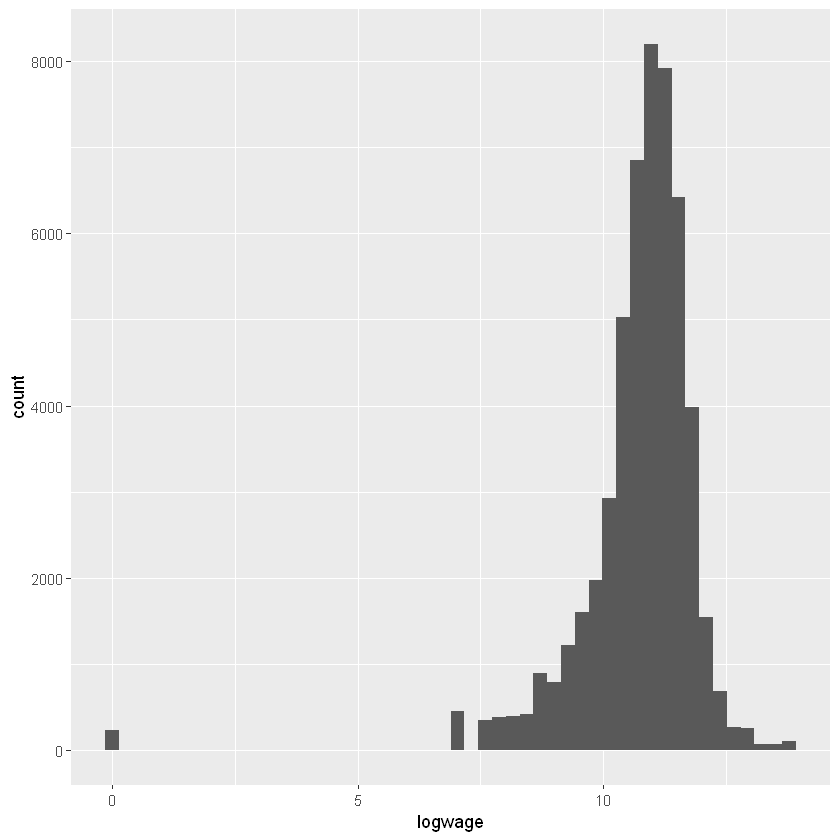

In [16]:
ggplot(data, aes(x = logwage)) +
  geom_histogram(bins = 50)

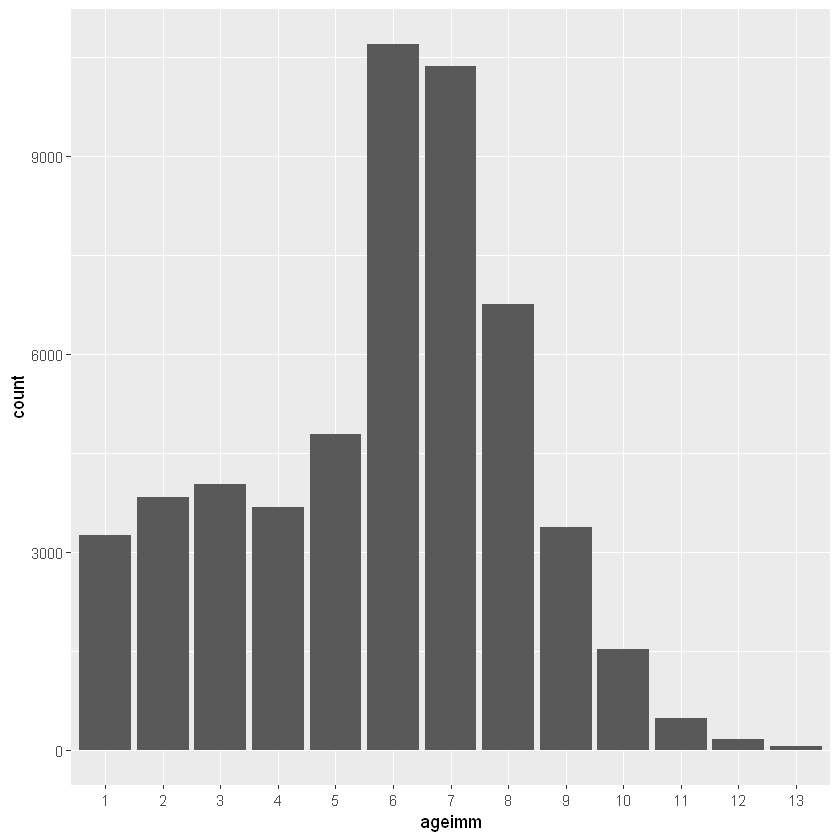

In [17]:
ggplot(data, aes(x = ageimm)) +
  geom_bar()

## Specifications 

In [18]:
#regression with no controls
s1<-lm(data = data, logwage ~ageimm)

In [19]:
# regression with dummies of interest
s2<-lm(data = data, logwage ~ageimm+gen_dum+vm_dum+kid_dum)

In [20]:
# regression with additional demographic controls
s3<-lm(data = data, logwage ~ageimm+gen_dum+vm_dum+kid_dum+agegrp+pob+kol)

In [21]:
#regression with additional education, school and work controls
s4<-lm(data = data, logwage ~ageimm+gen_dum+vm_dum+kid_dum+agegrp+pob+kol+hdgree+locstud+pwpr)

In [22]:
stargazer(s1,s2,s3,s4, omit = c("gen_dum","vm_dum","kid_dum","agegrp","pob","kol","hdgree", "locstud","pwpr"),title = "Regression Results", align = TRUE, type="text")


Regression Results
                                                                 Dependent variable:                                             
                    -------------------------------------------------------------------------------------------------------------
                                                                       logwage                                                   
                               (1)                         (2)                        (3)                         (4)            
---------------------------------------------------------------------------------------------------------------------------------
ageimm2                      -0.056*                     -0.030                      0.016                       0.015           
                             (0.029)                     (0.028)                    (0.027)                     (0.027)          
                                                                      

#### This is the code that I used to export my regression table
stargazer(s1,s2,s3,s4, omit = c("gen_dum","vm_dum","kid_dum","agegrp","pob","kol","hdgree", "locstud","pwpr"),title = "Regression Results", align = TRUE, type="html",out = "regression_table.html")

## Heterogeneity Test

### To further evaluate the effect of age of immigration on wages, I will perform this test by dividing my samples into subgroups based on vm_dum(dummy for visible minority) 

In [23]:
#based on whether the person is visible minority
sa<-lm(data=filter(data,vm_dum=="1"), logwage ~ageimm+gen_dum+kid_dum+agegrp+pob+kol+hdgree+locstud+pwpr)
sb<-lm(data=filter(data,vm_dum=="0"), logwage ~ageimm+gen_dum+kid_dum+agegrp+pob+kol+hdgree+locstud+pwpr)
stargazer(sa,sb, omit = c("gen_dum","kid_dum","agegrp","pob","kol","hdgree", "locstud","pwpr"),title = "Results based on Visible Minority Status", align = TRUE, type="text")


Results based on Visible Minority Status
                                     Dependent variable:                 
                    -----------------------------------------------------
                                           logwage                       
                               (1)                        (2)            
-------------------------------------------------------------------------
ageimm2                       -0.021                     0.032           
                             (0.034)                    (0.045)          
                                                                         
ageimm3                       -0.049                     0.049           
                             (0.033)                    (0.048)          
                                                                         
ageimm4                     -0.118***                   0.122**          
                             (0.034)                    (0.054)       